DMML Project exploration - retail sales analysis

Section I: import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from matplotlib import rcParams
# import seaborn as sns


In [32]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(device)

cpu


## Load Dataset

In [4]:
data= pd.read_excel('../data/MRP_data.xlsx')

## Exploratory Data Analysis (EDA)

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


### Missing Data

In [7]:
data.info()
# We can see that there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
#Shape
data.shape

(9994, 21)

In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Edit columns names

In [10]:
# Lower case column names
data.columns = map(str.lower, data.columns)
#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

### Check the unique values of columns

In [11]:
for c in data.columns:
    if len(set(data[c]))<20:
        print(c,set(data[c]))

ship_mode {'First Class', 'Standard Class', 'Same Day', 'Second Class'}
segment {'Home Office', 'Consumer', 'Corporate'}
country {'United States'}
region {'South', 'Central', 'West', 'East'}
category {'Technology', 'Office Supplies', 'Furniture'}
sub_category {'Chairs', 'Appliances', 'Bookcases', 'Machines', 'Art', 'Envelopes', 'Copiers', 'Accessories', 'Binders', 'Paper', 'Labels', 'Supplies', 'Furnishings', 'Phones', 'Storage', 'Fasteners', 'Tables'}
quantity {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
discount {0.0, 0.8, 0.2, 0.3, 0.45, 0.5, 0.7, 0.6, 0.32, 0.1, 0.4, 0.15}


In [12]:
a = data['category'].value_counts()
print(a)

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


### Separating data by the category (Furniture, Technology, Office Supplies)

In [13]:
df_furniture=data.loc[data['category'] == 'Furniture']
df_technology=data.loc[data['category'] == 'Technology']
df_office=data.loc[data['category'] == 'Office Supplies']

In [14]:
#Aggregating sales by order date
furniture= df_furniture.groupby('order_date')['sales'].sum().reset_index()

In [15]:
furniture.head()

,order_date,sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [16]:
#Set index 
furniture = furniture.set_index('order_date')


In [17]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='order_date', length=889, freq=None)

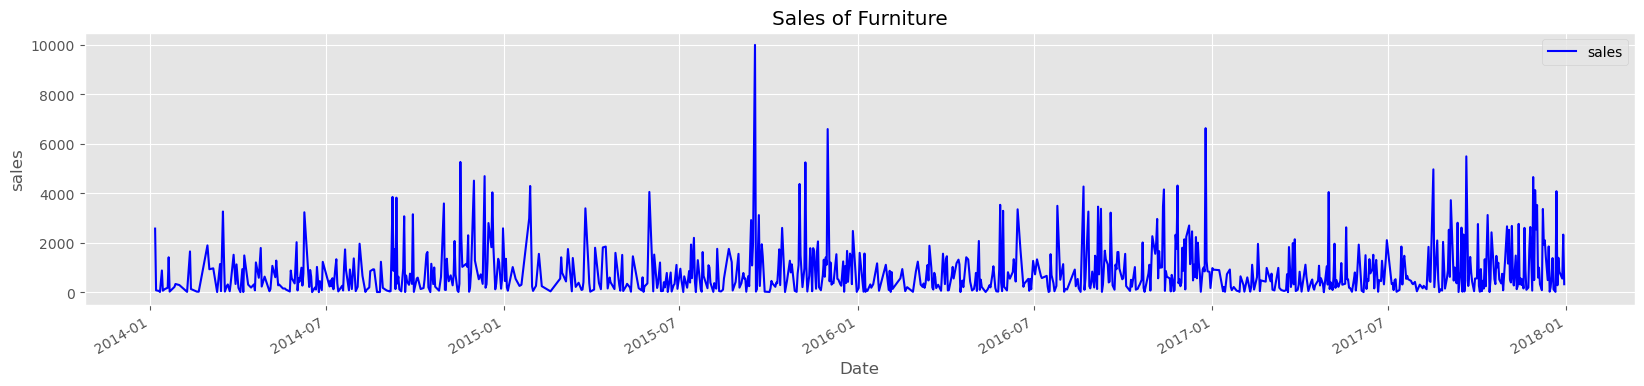

In [18]:
furniture_sales = furniture[['sales']]
furniture_sales.plot(color='blue',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Furniture")
plt.show()

In [19]:
# Using averages daily sales value - set start of the month as index
avg_furniture_sales = furniture_sales['sales'].resample('MS').mean()
avg_furniture_sales.head()


order_date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: sales, dtype: float64

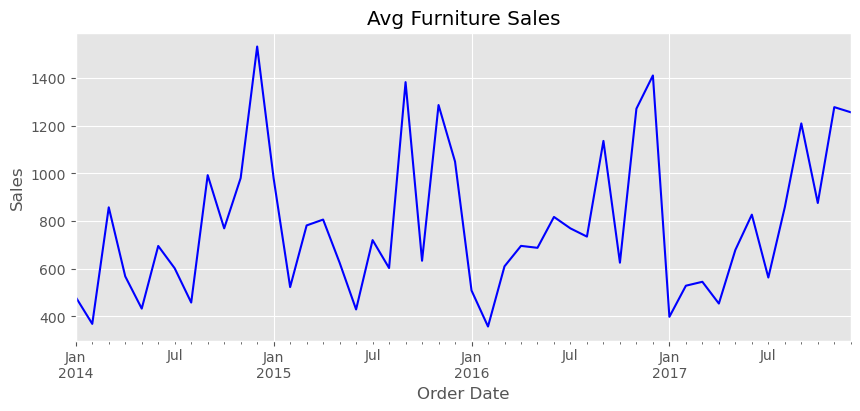

In [20]:
avg_furniture_sales.plot(figsize=(10, 4),color='blue')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Avg Furniture Sales")
plt.show()


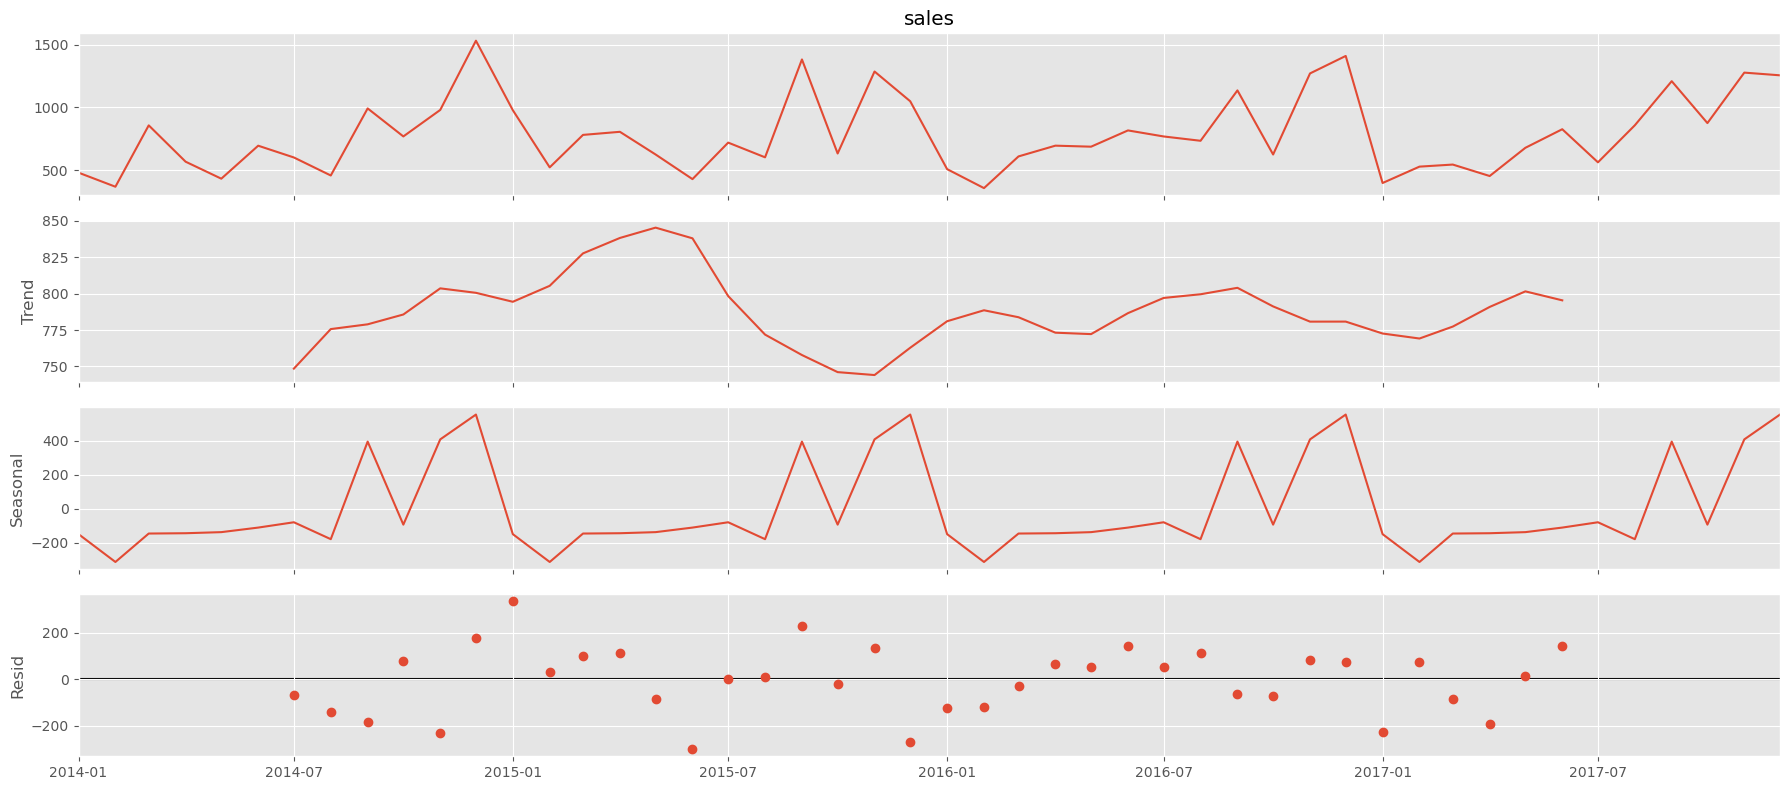

In [21]:
#Furniture sales time-series decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(avg_furniture_sales, model='additive')
fig = decomposition.plot()
plt.show()

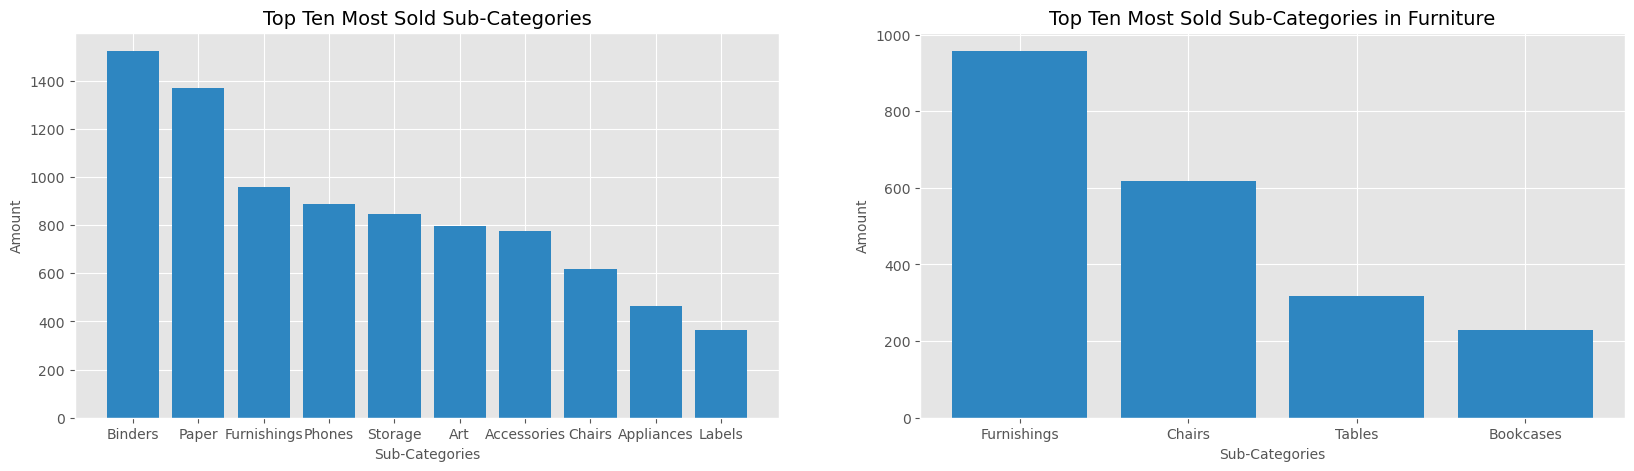

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(x=data['sub_category'].value_counts().sort_values(ascending=False)[:10].index,
           height=data['sub_category'].value_counts().sort_values(ascending=False)[:10].values,color='#2E86C1')
plt.title('Top Ten Most Sold Sub-Categories',size=14)
plt.xlabel('Sub-Categories',size=10)
plt.ylabel('Amount',size=10)

plt.subplot(1,2,2)
plt.bar(x=df_furniture['sub_category'].value_counts().sort_values(ascending=False)[:10].index,
           height=df_furniture['sub_category'].value_counts().sort_values(ascending=False)[:10].values,color='#2E86C1')
plt.title('Top Ten Most Sold Sub-Categories in Furniture',size=14)
plt.xlabel('Sub-Categories',size=10)
plt.ylabel('Amount',size=10)

plt.show()

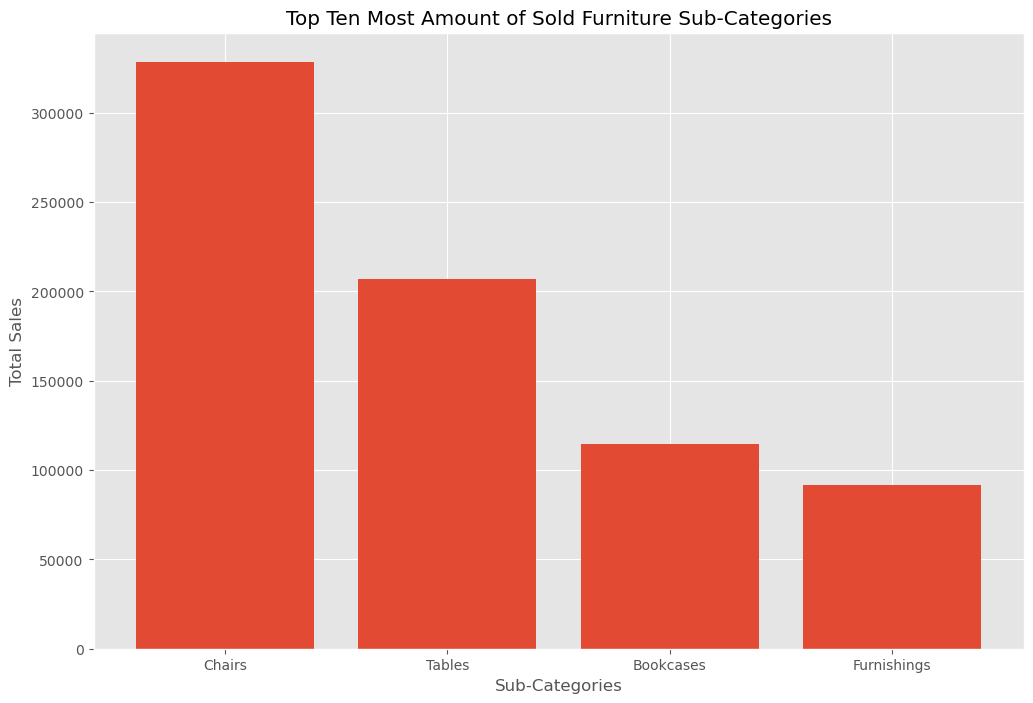

In [63]:
f = df_furniture.groupby('sub_category')['sales'].sum().sort_values(ascending=False)
plt.bar(x=f.index, height=f.values)
plt.title("Top Ten Most Amount of Sold Furniture Sub-Categories")
plt.xlabel("Sub-Categories")
plt.ylabel("Total Sales") 
plt.show()

In [ ]:
#total quantity of products on this file
data['quantity'].sum()

In [ ]:
#Quantity grouped by region
data.groupby(['region'])['quantity'].sum()

The bellow heat map graph, indicate the positive and negative correlation between variables.
There is a negative correlation between discount and profit. 

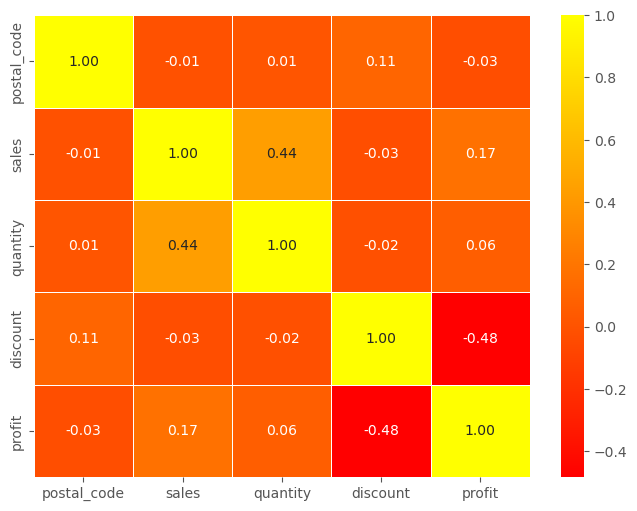

In [18]:


# Data preparation
df1 = df_furniture[['postal_code', 'sales', 'quantity', 'discount', 'profit']]
df_corr = df1.corr()

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='autumn', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

## Data Preprossesing

In [22]:
len(avg_furniture_sales)

48

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [30]:
# Split data into test and train. Reshape it to a 2d array with one column (i.e. (36,1), each row is the timestep and its associated value)
train_data = np.array(avg_furniture_sales[:-12]).reshape(-1, 1)
test_data = np.array(avg_furniture_sales[-12:]).reshape(-1, 1)

# Scale train and test data
scaler = MinMaxScaler(feature_range=(-1, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Parameters
n_input = 12
n_features = 1
batch_size = 10
epochs = 200
n_runs = 3

# Convert training data into sequences (sliding windows) needed for LSTM. each sequence of 12 the target is the next value, i.e. 13th.
def create_sequences(data, n_input):
    sequences = []
    for i in range(len(data) - n_input):
        seq = data[i:i + n_input]
        label = data[i + n_input]
        sequences.append((seq, label))
    return sequences

train_sequences = create_sequences(train_scaled, n_input)

# Convert to PyTorch tensors
train_x = torch.tensor([seq[0] for seq in train_sequences], dtype=torch.float32)
train_y = torch.tensor([seq[1] for seq in train_sequences], dtype=torch.float32)


# Create the model and train it - Vanilla LSTM

In [25]:
print(train_x.shape)

torch.Size([24, 12, 1])


In [26]:
# Dataset and DataLoader
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, n_input, n_features):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=50, batch_first=True)
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer with a probability of 0.2
        self.fc1 = nn.Linear(50, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out)  # Apply dropout
        x = torch.relu(self.fc1(lstm_out[:, -1, :]))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [34]:
# Train the model
def train_model(model, train_loader, epochs):
    model.train()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 25 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')




Make predictions

In [48]:
# Make future predictions - run just once
# Initialize and train the model
model = LSTMModel(n_input, n_features)
train_model(model, train_loader, epochs)

model.eval()
pred_list = []
batch = train_scaled[-n_input:].reshape((1, n_input, n_features))
batch = torch.tensor(batch, dtype=torch.float32)

with torch.no_grad():
    for i in range(n_input):
        pred = model(batch).item()
        pred_list.append(pred)
        batch = torch.cat((batch[:, 1:, :], torch.tensor([[[pred]]], dtype=torch.float32)), dim=1)

# Inverse transform the predictions
predicted_sales = scaler.inverse_transform(np.array(pred_list).reshape(-1, 1))

# Create a dataframe for predictions
df_predict = pd.DataFrame(predicted_sales, index=avg_furniture_sales[-n_input:].index, columns=['Prediction'])

In [ ]:
print(df_predict)

In [24]:
def reset_weights(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

In [58]:
# Averaging over multiple runs (to keep the loop structure like in the original code)
n_runs = n_runs
store = np.zeros((n_input, n_runs))
model = LSTMModel(n_input, n_features)

for i in range(n_runs):
    #reset_weights(model)  # Reset the weights to random
    model = LSTMModel(n_input, n_features)
    train_model(model, train_loader, epochs)
    pred_list = []

    batch = train_scaled[-n_input:].reshape((1, n_input, n_features))
    batch = torch.tensor(batch, dtype=torch.float32)

    with torch.no_grad():
        for j in range(n_input):
            pred = model(batch).item()
            pred_list.append(pred)
            batch = torch.cat((batch[:, 1:, :], torch.tensor([[[pred]]], dtype=torch.float32)), dim=1)

    store[:, i] = scaler.inverse_transform(np.array(pred_list).reshape(-1, 1)).flatten()

# Averaging predictions
final_vanilla = np.mean(store, axis=1)

Epoch [25/150], Loss: 0.4230
Epoch [50/150], Loss: 0.4023
Epoch [75/150], Loss: 0.2957
Epoch [100/150], Loss: 0.1295
Epoch [125/150], Loss: 0.0350
Epoch [150/150], Loss: 0.0299
Epoch [25/150], Loss: 0.4264
Epoch [50/150], Loss: 0.3145
Epoch [75/150], Loss: 0.2559
Epoch [100/150], Loss: 0.0697
Epoch [125/150], Loss: 0.0232
Epoch [150/150], Loss: 0.0166
Epoch [25/150], Loss: 0.4270
Epoch [50/150], Loss: 0.4037
Epoch [75/150], Loss: 0.3097
Epoch [100/150], Loss: 0.1574
Epoch [125/150], Loss: 0.0059
Epoch [150/150], Loss: 0.0132


In [59]:
print(final_vanilla)

[ 709.27092628  441.84485589  287.50286528  422.9936233   638.9843994
  644.95231404  677.40757718 1312.34850175  872.50635205 1077.82456311
 1157.23154207 1231.62801892]


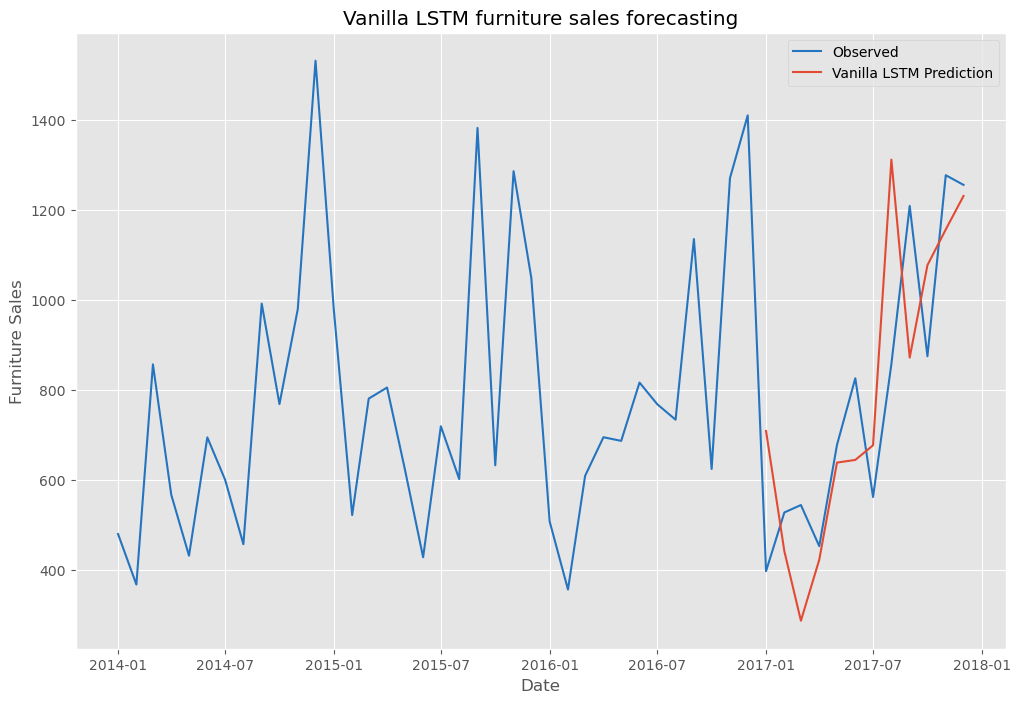

In [60]:
# report performance
rcParams['figure.figsize'] = 12, 8
# line plot of observed vs predicted
plt.plot(avg_furniture_sales.index,avg_furniture_sales,label="Observed",color='#2574BF')
plt.plot(avg_furniture_sales[36:].index,final_vanilla,label="Vanilla LSTM Prediction")
plt.title('Vanilla LSTM furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [43]:
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    performance_data= {'MSE':round(mse, 2),
                      'RMSE':round(np.sqrt(mse), 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

In [61]:
vanilla_lstm= performance(avg_furniture_sales[-12:],final_vanilla)
vanilla_lstm

{'MSE': np.float64(49632.13),
 'RMSE': np.float64(222.78),
 'MAPE': np.float64(26.02)}

### Stacked LSTM

In [86]:
# Define the stacked LSTM model
class StackedLSTMModel(nn.Module):
    def __init__(self, n_input, n_features):
        super(StackedLSTMModel, self).__init__()
        # First LSTM layer (returns entire sequences)
        self.lstm1 = nn.LSTM(input_size=n_features, hidden_size=50, batch_first=True, dropout =0.2,num_layers=2)
        # Second LSTM layer (returns entire sequences)
        self.lstm2 = nn.LSTM(input_size=50, hidden_size=50, batch_first=True)
        #manual dropout
        self.dropout = nn.Dropout(0.2)
        # Fully connected layers
        self.fc1 = nn.Linear(50, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        lstm_out1, _ = self.lstm1(x)
        lstm_out2, _ = self.lstm2(lstm_out1)
        x = lstm_out2[:, -1, :]  # Get the last time step output
        #x = self.dropout(x)  # Apply dropout here
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [90]:
# Train and predict multiple times
n_runs = n_runs
store2 = np.zeros((12, n_runs))

for i in range(n_runs):
    # Initialize the model
    model_stacked = StackedLSTMModel(n_input=n_input, n_features=n_features)
    
    # Train the model
    train_model(model_stacked, train_loader, epochs=200)
    
    # Make predictions
    pred_list_s = []
    batch = train_scaled[-n_input:].reshape((1, n_input, n_features))
    batch = torch.tensor(batch, dtype=torch.float32)

    with torch.no_grad():
        for j in range(n_input):
            pred = model_stacked(batch).item()  # Get prediction
            pred_list_s.append(pred)
            # Update the batch by appending the predicted value
            batch = torch.cat((batch[:, 1:, :], torch.tensor([[[pred]]], dtype=torch.float32)), dim=1)

    # Inverse transform the predictions and store them
    store2[:, i] = scaler.inverse_transform(np.array(pred_list_s).reshape(-1, 1)).flatten()

# Average the results across runs (if needed)
final_stacked = np.mean(store2, axis=1)
print(final_stacked)

Epoch [25/200], Loss: 0.4219
Epoch [50/200], Loss: 0.4297
Epoch [75/200], Loss: 0.3272
Epoch [100/200], Loss: 0.1516
Epoch [125/200], Loss: 0.0601
Epoch [150/200], Loss: 0.0242
Epoch [175/200], Loss: 0.0040
Epoch [200/200], Loss: 0.0016
Epoch [25/200], Loss: 0.4219
Epoch [50/200], Loss: 0.4281
Epoch [75/200], Loss: 0.2546
Epoch [100/200], Loss: 0.4107
Epoch [125/200], Loss: 0.0041
Epoch [150/200], Loss: 0.0029
Epoch [175/200], Loss: 0.0011
Epoch [200/200], Loss: 0.0024
Epoch [25/200], Loss: 0.4213
Epoch [50/200], Loss: 0.4300
Epoch [75/200], Loss: 0.2805
Epoch [100/200], Loss: 0.0421
Epoch [125/200], Loss: 0.2295
Epoch [150/200], Loss: 0.0056
Epoch [175/200], Loss: 0.0093
Epoch [200/200], Loss: 0.0174
[ 646.50992388  580.53913392  513.57873689  499.67909524  549.24989751
  695.78381309  674.1520368  1068.87456383  715.07548473  860.88498177
 1181.42500872 1275.42815188]


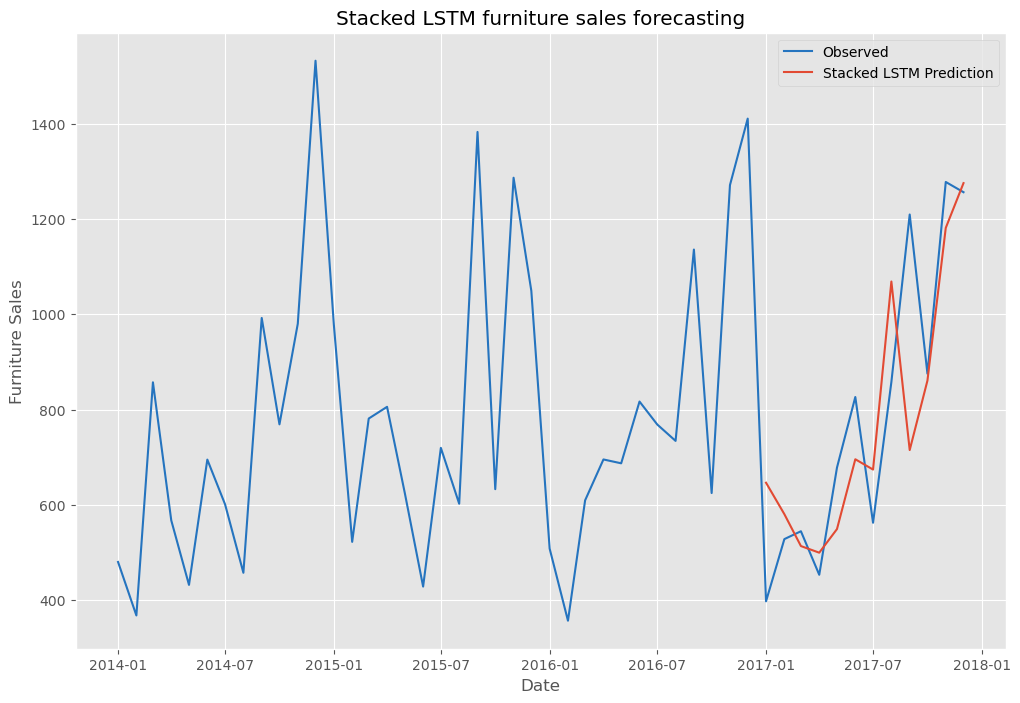

In [91]:
plt.plot(avg_furniture_sales.index,avg_furniture_sales,label="Observed",color='#2574BF')
plt.plot(avg_furniture_sales[36:].index,final_stacked,label="Stacked LSTM Prediction")
plt.title('Stacked LSTM furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [92]:
stacked_lstm= performance(avg_furniture_sales[-12:],final_stacked)
stacked_lstm

{'MSE': np.float64(34404.6),
 'RMSE': np.float64(185.48),
 'MAPE': np.float64(18.28)}

## Bidirectional LSTM

#### Define Bidirectional LSTM Model


In [27]:
class BidirectionalLSTMModel(nn.Module):
    def __init__(self, n_input, n_features):
        super(BidirectionalLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=50, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer with a probability of 0.2
        self.fc1 = nn.Linear(100, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out)  # Apply dropout
        x = torch.relu(self.fc1(lstm_out[:, -1, :]))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [36]:
# Train and predict multiple times
store3 = np.zeros((n_input, n_runs))

for i in range(n_runs):
    # Initialize the model
    model_bidirec = BidirectionalLSTMModel(n_input=n_input, n_features=n_features).to(device)
    
    # Train the model
    train_model(model_bidirec, train_loader, epochs)
    
    # Make predictions
    pred_list_s = []
    batch = train_data[-n_input:].reshape((1, n_input, n_features))
    batch = torch.tensor(batch, dtype=torch.float32).to(device)

    with torch.no_grad():
        for j in range(n_input):
            pred = model_bidirec(batch).item()  # Get prediction
            pred_list_s.append(pred)
            # Update the batch by appending the predicted value
            pred_tensor = torch.tensor([[[pred]]], dtype=torch.float32).to(device)  # Ensure pred is on device
            batch = torch.cat((batch[:, 1:, :], pred_tensor), dim=1)


    # Inverse transform the predictions and store them
    store3[:, i] = scaler.inverse_transform(np.array(pred_list_s).reshape(-1, 1)).flatten()

# Average the results across runs (if needed)
final_bidirec = np.mean(store3, axis=1)

Epoch [25/200], Loss: 0.4206
Epoch [50/200], Loss: 0.3972
Epoch [75/200], Loss: 0.2162
Epoch [100/200], Loss: 0.0570
Epoch [125/200], Loss: 0.0081
Epoch [150/200], Loss: 0.0109
Epoch [175/200], Loss: 0.0169
Epoch [200/200], Loss: 0.0134
Epoch [25/200], Loss: 0.4223
Epoch [50/200], Loss: 0.3227
Epoch [75/200], Loss: 0.1745
Epoch [100/200], Loss: 0.0398
Epoch [125/200], Loss: 0.0383
Epoch [150/200], Loss: 0.0251
Epoch [175/200], Loss: 0.0115
Epoch [200/200], Loss: 0.0062
Epoch [25/200], Loss: 0.4292
Epoch [50/200], Loss: 0.3096
Epoch [75/200], Loss: 0.1354
Epoch [100/200], Loss: 0.0407
Epoch [125/200], Loss: 0.0156
Epoch [150/200], Loss: 0.0216
Epoch [175/200], Loss: 0.0129
Epoch [200/200], Loss: 0.0021


In [37]:
print(final_bidirec)
print(final_bidirec.shape)

[ 656.43210984  -11.06298662  156.96616202  394.68710938  606.5861076
  572.86934197  672.51720212  694.09242743 1018.32964967  842.7541538
  979.84138002 1063.72050801]
(12,)


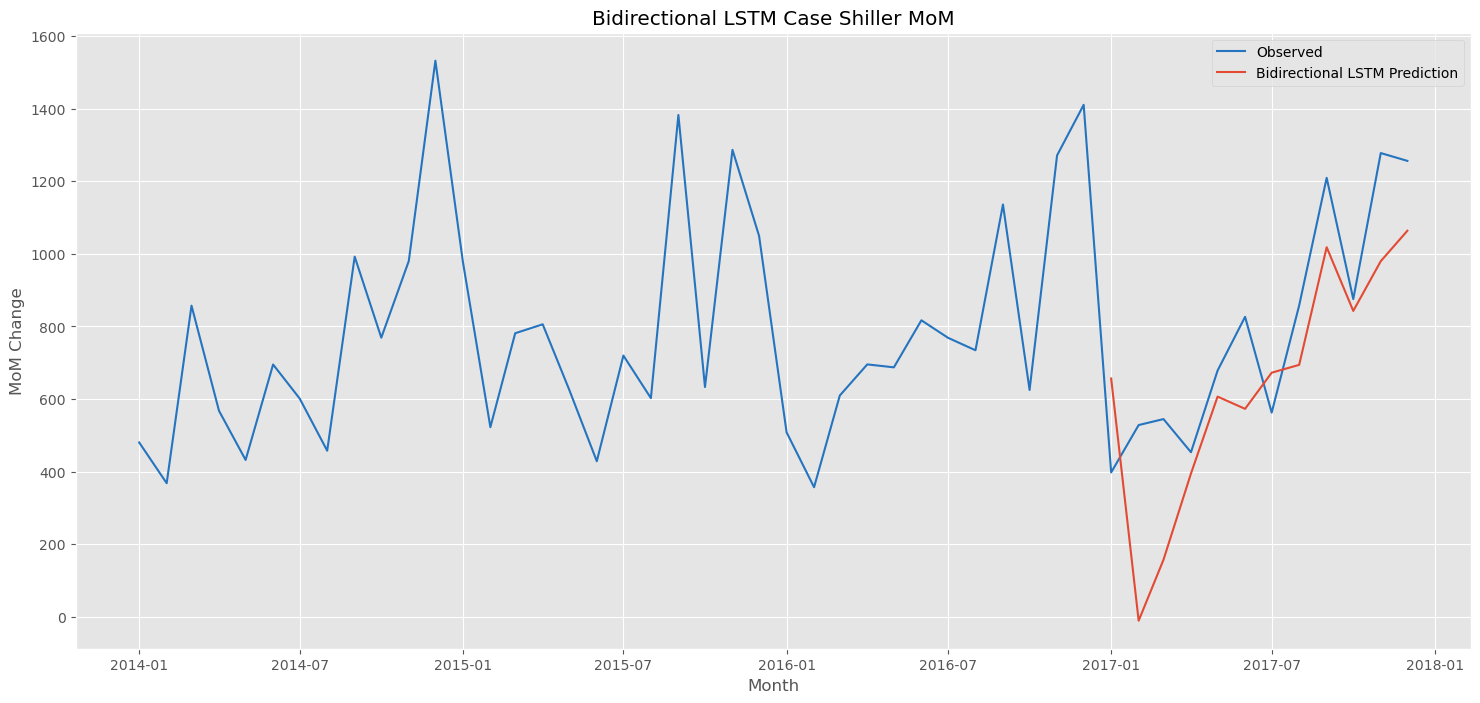

In [41]:
plt.plot(avg_furniture_sales.index,avg_furniture_sales, label="Observed", color='#2574BF')
plt.plot(avg_furniture_sales[36:].index, final_bidirec, label="Bidirectional LSTM Prediction")
plt.title('Bidirectional LSTM Case Shiller MoM')
plt.xlabel('Month')
plt.ylabel('MoM Change')
plt.legend()
plt.show()

In [45]:
bidirec_lstm = performance(avg_furniture_sales[-12:],final_bidirec)
bidirec_lstm

{'MSE': 65282.74, 'RMSE': 255.5, 'MAPE': 32.45}

## Convolutional Neural Network (CNN)

In [46]:
# CNN Model
class CNNModel(nn.Module):
    def __init__(self, n_input, n_features):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(n_input, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(128, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128, 100)
        self.fc2 = nn.Linear(100,1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        # x = torch.avg_pool1d(x, kernel_size=3, padding=1, count_include_pad=False)
        x = torch.max_pool1d(x, kernel_size=3, padding=1)
        x = torch.flatten(x,1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [51]:
# Averaging over multiple runs (to keep the loop structure like in the original code)
store4 = np.zeros((n_input, n_runs))

for i in range(n_runs):
    #reset_weights(model)  # Reset the weights to random
    model = CNNModel(n_input, n_features).to(device)
    train_model(model, train_loader, epochs)
    pred_list = []

    batch = train_data[-n_input:].reshape((1, n_input, n_features))
    batch = torch.tensor(batch, dtype=torch.float32).to(device)

    with torch.no_grad():
        for j in range(n_input):
            pred = model(batch).item()
            pred_list.append(pred)
           # Update the batch by appending the prediction and removing the first element
            pred_tensor = torch.tensor([[[pred]]], dtype=torch.float32).to(device)  # Ensure pred is on device
            batch = torch.cat((batch[:, 1:, :], pred_tensor), dim=1)

    store4[:, i] = scaler.inverse_transform(np.array(pred_list).reshape(-1, 1)).flatten()

# Averaging predictions
final_cnn = np.mean(store4, axis=1)

Epoch [25/200], Loss: 0.0074
Epoch [50/200], Loss: 0.0000
Epoch [75/200], Loss: 0.0000
Epoch [100/200], Loss: 0.0000
Epoch [125/200], Loss: 0.0002
Epoch [150/200], Loss: 0.0000
Epoch [175/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0000
Epoch [25/200], Loss: 0.0056
Epoch [50/200], Loss: 0.0008
Epoch [75/200], Loss: 0.0000
Epoch [100/200], Loss: 0.0000
Epoch [125/200], Loss: 0.0000
Epoch [150/200], Loss: 0.0000
Epoch [175/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0000
Epoch [25/200], Loss: 0.0034
Epoch [50/200], Loss: 0.0003
Epoch [75/200], Loss: 0.0000
Epoch [100/200], Loss: 0.0000
Epoch [125/200], Loss: 0.0002
Epoch [150/200], Loss: 0.0000
Epoch [175/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0010


In [52]:
print(final_cnn)
print(final_cnn.shape)

[-234632.55876459 -259876.04429958 -185275.71531147 -119603.27671921
 -165598.35213949   44734.06626938  -66980.80810634   33572.01905
   35821.78791332 -149204.84757283   60349.00024412  117430.44700383]
(12,)


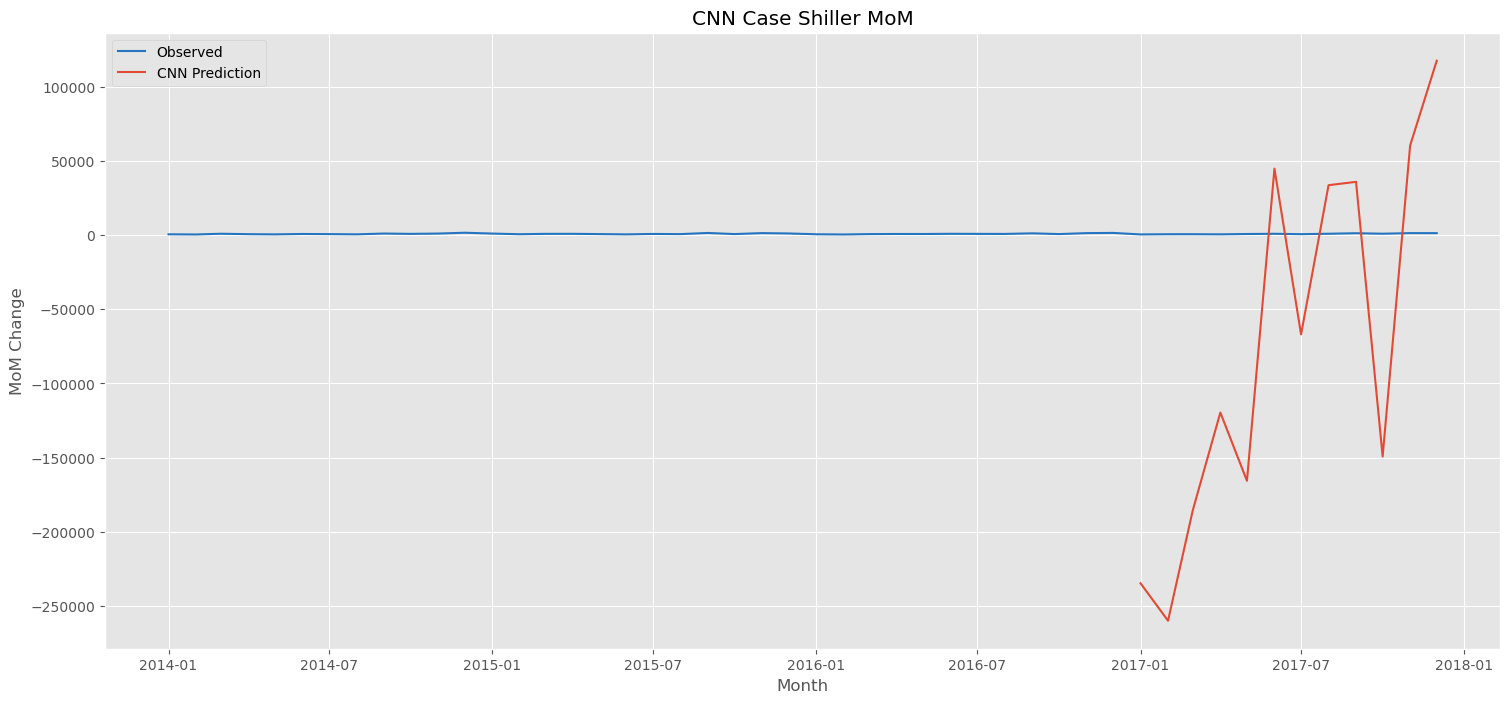

In [53]:
plt.plot(avg_furniture_sales.index,avg_furniture_sales,label="Observed",color='#2574BF')
plt.plot(avg_furniture_sales[36:].index,final_cnn,label="CNN Prediction")
plt.title('CNN Case Shiller MoM')
plt.xlabel('Month')
plt.ylabel('MoM Change')
plt.legend()
plt.show()

In [ ]:
cnn = performance(data_targets,final_cnn)
cnn

## Compare Results

In [ ]:
print(f"Vanilla LSTM: {vanilla_lstm}")
print(f"Stacked LSTM: {stacked_lstm}")
print(f"Bidirec LSTM: {bidirec_lstm}")
print(f"Conv NN LSTM: {cnn}")

In [ ]:
# report performance
rcParams['figure.figsize'] = 12, 8
# line plot of observed vs predicted
plt.plot(data.index,data,label="Observed",color='#2574BF')
#Vanilla LSTM
plt.plot(data[split:].index,final_vanilla,label="Vanilla LSTM Prediction",linestyle= "-", color='orange')
#Stacked LSTM
plt.plot(data[split:].index,final_stacked,label="Stacked LSTM Prediction",linestyle= "-.", color="red")
#Bidirectional LSTM
plt.plot(data[split:].index,final_bidirec,label="Bidirectional LSTM Prediction",marker=',',color='black')
#CNN model
plt.plot(data[split:].index,final_cnn,label="CNN Prediction",marker="*",color="purple")
plt.title('All models comparison - Case Shiller MoM Change')
plt.xlabel('Month')
plt.ylabel('MoM Change')
plt.legend(loc='upper left')
plt.show()